# Cross-Selling Assicurativo

AssurePredict è una compagnia di assicurazioni leader nel settore, specializzata nell'offrire soluzioni innovative per la gestione del rischio. Questo progetto mira a creare un modello predittivo in grado di individuare potenziali opportunità di cross-selling per clienti esistenti, identificando quelli che potrebbero essere interessati ad acquistare una polizza aggiuntiva per il loro veicolo.

## Obiettivo del Progetto

L'obiettivo è sviluppare un modello di machine learning che preveda se i clienti, che attualmente hanno un'assicurazione sanitaria, potrebbero essere interessati a sottoscrivere una polizza assicurativa per il loro veicolo. Il modello aiuterà AssurePredict a migliorare l'efficacia delle proprie strategie di cross-selling e ad aumentare la penetrazione nel mercato.

## Valore aggiunto per AssurePredict:

Aumento del tasso di conversione nelle vendite di polizze auto.
Ottimizzazione delle campagne di marketing, indirizzando le offerte a clienti più propensi ad acquistare.
Riduzione dei costi legati a campagne di marketing inefficaci, grazie alla targettizzazione precisa.

## Dataset

Il dataset (che è scaricabile da qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/insurance_cross_sell.csv) contiene informazioni dettagliate sui clienti e sul loro comportamento assicurativo. Le caratteristiche principali del dataset sono:

- id: identificativo univoco del cliente.
- Gender: sesso del cliente.
- Age: età del cliente.
- Driving_License: 1 se il cliente possiede la patente di guida, 0 altrimenti.
- Region_Code: codice univoco della regione di residenza del cliente.
- Previously_Insured: 1 se il cliente ha già un veicolo assicurato, 0 altrimenti.
- Vehicle_Age: età del veicolo del cliente.
- Vehicle_Damage: 1 se il cliente ha avuto incidenti o danni al veicolo in passato, 0 altrimenti.
- Annual_Premium: importo annuale del premio assicurativo pagato dal cliente.
- PolicySalesChannel: canale utilizzato per la vendita della polizza (es. email, telefono, di persona).
- Vintage: giorni da cui il cliente è assicurato con AssurePredict.
- Response: 1 se il cliente ha accettato la proposta di cross-sell, 0 altrimenti.

## Attività Richieste
1. Esplorazione del Dataset
L'esplorazione preliminare del dataset permetterà di comprendere meglio la distribuzione delle caratteristiche e delle variabili target. In particolare, si analizzeranno:

- La distribuzione della variabile "Response", per identificare eventuali sbilanciamenti tra clienti che accettano o rifiutano l'offerta di cross-sell.
- Le relazioni tra variabili chiave come Annual Premium, Vehicle Age, Previously Insured, e la risposta del cliente.

Valore aggiunto: Un'accurata esplorazione dei dati permette di identificare pattern nascosti e punti critici che influenzeranno il successo del modello predittivo.

2. Gestione dello Sbilanciamento delle Classi
La variabile target "Response" potrebbe essere sbilanciata, con molti più clienti che rifiutano l'offerta rispetto a quelli che la accettano. Per affrontare questo problema, verranno utilizzate tecniche di:

Class Weights: penalizzazione della classe più frequente nel modello.
Oversampling o Undersampling: creazione di un dataset più bilanciato per migliorare la capacità del modello di generalizzare.
Valore aggiunto: Gestire correttamente lo sbilanciamento delle classi è cruciale per evitare modelli che abbiano un alto tasso di falsi negativi, migliorando così la precisione del cross-sell.

3. Costruzione del Modello Predittivo
Utilizzando algoritmi di machine learning, verrà costruito un modello che predice la probabilità che un cliente risponda positivamente all'offerta di cross-sell.

Valore aggiunto: Il modello predittivo permetterà a AssurePredict di identificare con precisione i clienti più propensi a sottoscrivere una polizza aggiuntiva, migliorando così il ritorno sull'investimento delle campagne di marketing.

## Conclusione
Questo progetto permetterà a AssurePredict di sfruttare le potenzialità del machine learning per identificare opportunità di cross-selling in modo efficace e mirato. L'adozione di un approccio data-driven per la predizione delle risposte dei clienti garantirà non solo un aumento delle vendite, ma anche una maggiore soddisfazione del cliente grazie a offerte più pertinenti e personalizzate.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, log_loss, f1_score, RocCurveDisplay

## Il dataset

Importazione ed esplorazione del dataset al fine di comprenderne la struttura e identificare eventuali feature sulle quali agire in fase di pre-processing

In [ ]:
df = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/insurance_cross_sell.csv", index_col=0)

df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


Da una prima ispezione del dataset si possono identificare a colpo d'occhio le variabili che dovranno essere rese numeriche in fase di pre-processing:
- Gender
- Vehicle_Age
- Vehicle_Damage

Le 3 feature sono infatti le uniche con tipologia "object", come riscontrabile dalla tabella sottostante.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


Verifichiamo che non ci siano valori vuoti all'interno del dataset perchè potrebbero inficiare e l'analisi e andrebbero pertanto gestiti

In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


Il dataset non presenta dati nulli o non presenti per nessuna feature.

### Indici di posizione delle feature

Andiamo ad ispezionare gli indici di posizione per le variabili numeriche così da identificare potenziali anomalie o punti di attenzione utili per la definizione del modello.

In [ ]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Proviamo ad indagare eventuali differenze di genere all'interno del dataset. Su variabili qualitative il grafico migliore è il boxplot

Text(0.5, 1.0, 'Distribuzione delle età in base al sesso')

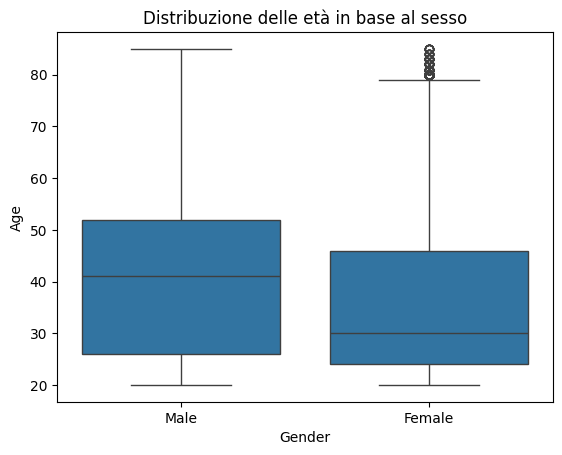

In [ ]:
sns.boxplot(data=df, x="Gender", y="Age")
plt.title("Distribuzione delle età in base al sesso")

Innanzitutto notiamo come nel campione analizzato gli uomini abbiano una mediana ben più alta delle donne. Questo implica che ci sono molti più uomini nel dataset in età tra i 30 e i 40 anni circa.

Completiamo questa considerazione verificando quanti uomini e quante donne ci siano nel dataset.

In [ ]:
round (df["Gender"].value_counts()/df["Gender"].value_counts().sum(),2)

,count
Gender,
Male,0.54
Female,0.46


Possiamo quindi concludere che nel dataset ci sia una sostanziale equidistribuzione tra uomini e donne, con un leggero sbilanciamento verso gli uomini.

### Persone senza patente con polizza auto sottoscritta

Dagli indici di posizione, vediamo che il minimo per la variabile "Driving_License" è di 0. Questo vuol dire che ci sono persone nel dataset che non dispongono di patente di guida.

Verifichiamo se esistano persone che, pur non avendo la patente, abbiano sottoscritto una polizza auto.

In [ ]:
df[(df["Driving_License"]==0) & (df["Response"]==1)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
9258,Female,53,0,8.0,0,1-2 Year,Yes,39478.0,25.0,234,1
20931,Female,44,0,3.0,0,1-2 Year,Yes,35644.0,26.0,272,1
26168,Male,63,0,28.0,0,1-2 Year,Yes,2630.0,122.0,44,1
30955,Male,45,0,28.0,0,1-2 Year,Yes,51397.0,124.0,43,1
35297,Female,67,0,28.0,0,1-2 Year,Yes,56891.0,26.0,42,1
45455,Male,61,0,8.0,0,1-2 Year,Yes,2630.0,26.0,76,1
46301,Female,69,0,28.0,0,1-2 Year,Yes,31145.0,122.0,82,1
48343,Male,55,0,29.0,0,1-2 Year,Yes,2630.0,26.0,232,1
53513,Male,59,0,8.0,0,1-2 Year,Yes,47979.0,26.0,212,1


41 persone senza patente hanno sottoscritto una polizza auto.

La cosa è ovviamente anomala e le strade possibili sono 2:
- non si tratta di errore perchè la legge consente che una persona sottoscriva una polizza auto non essendo la persona che poi guiderà. Pagherà dunque i premi ma non sarà lui l'utilizzatore del veicolo
- errore nella compilazione del dataframe

Non conoscendo le dinamiche legali e trattandosi di 41 casi su un dataset da più di 381000, si procederà con l'eliminazione di queste righe in fase di pre-processing

### Vehicle_Age

La feature "Vehicle_Age", testuale, andrà sicuramente convertita in valore numerico. Per fare questo, si deve prima verificare quali siano i valori che assume

In [ ]:
df["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

La classificazione è stata fatta utilizzando 3 possibili valori, trattati come stringhe testuali:
- minore di un anno
- tra 1 e 2 anni
- più di 2 anni

Chiaramente avere questa variabile espressa in questa forma non è ideale per condurre l'analisi numerica con un modello di machine learning. So dovrà pertanto, nella fase di pre-processing, procedere ad una conversione in valori numerici

### Conversioni del cross-selling

Verifichiamo, in base ai dati raccolti, quale sia stato il tasso di successo nella vendita di una polizza auto ai clienti già detentori di una copertura sanitaria.

In [ ]:
round( df["Response"].value_counts()/df["Response"].value_counts().sum(),2)

,count
Response,
0,0.88
1,0.12


La maggior parte delle persone raggiunte dall'iniziativa, 88%, non è stata convertita all'acquisto di una polizza auto. Il tasso di conversione si attesta dunque al 12%.

Questo è un dato importante perchè è la chiave dell'efficienza, e quindi del risparmio in termini di tempo, che il modello di machine learning può portare all'azienda.

Qualora infatti il modello avesse successo, si potrebbe fare una predizione sufficientemente accurata da poter direzionare gli sforzi di cross-selling solo sulle persone indicate dal modello come potenziali successi. Questo potrebbe portare il tasso di conversione oltre il 12%, avendo concentrato tempo e sforzi solo su chi è incline all'acquisto di una polizza auto.

Inoltre ci indica che la variabile target del nostro modello sia sbilanciata e questo implica che si dovrà gestire la cosa in sede di addestramento del modello.

### Premio annuale

Dagli indici di posizione si nota una grandissima differenza tra il valore del terzo quartile (75mo percentile) e il valore massimo del premio annuale pagato.

Questo sta ad indicare una distribuzione molto concentrata a sinistra, intorno a un range ben ristretto di valori del premio, con una coda destra di valori molto lunga e bassa.

Questo risulta in maniera visiva dal grafico sottostante

Text(0.5, 1.0, 'Distribuzione delle frequenze dei premi annuali')

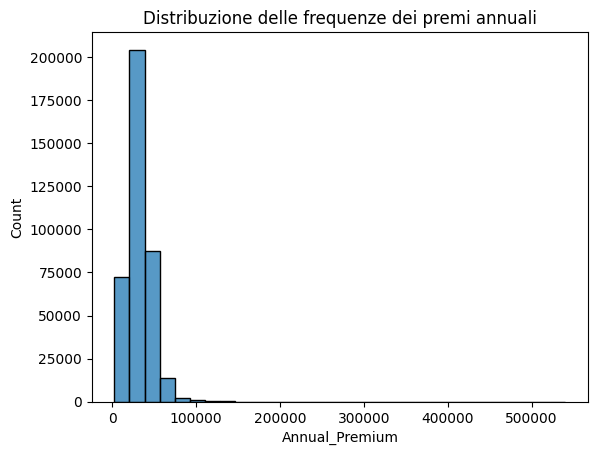

In [ ]:
sns.histplot(data=df, x="Annual_Premium", bins=30)
plt.title("Distribuzione delle frequenze dei premi annuali")

Il grafico mostra dei picchi attorno ai valori di premio tra i 40 e i 60k.
Proviamo a filtrare il dataset per estrarre una visione di tutti i valori con premio superiore ai 60k$

In [ ]:
df[(df["Annual_Premium"]>60000)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
69,Male,63,1,28.0,1,1-2 Year,No,61739.0,124.0,79,0
140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
...,...,...,...,...,...,...,...,...,...,...,...
381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381040,Female,75,1,28.0,0,> 2 Years,Yes,60958.0,26.0,256,0
381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


12159 valori. Che se paragonati alle quasi 400k osservazioni, si capisce la scarsa entità, sul campione, di queste occorrenze.

### Anzianità del cliente

Vediamo se esistono degli schemi ricorrenti sulla variabile Vintage, che indica il numero di giorni da cui il cliente è assicurato con la compagnia.

Text(0.5, 1.0, "Distribuzione dell'anzianità dei clienti")

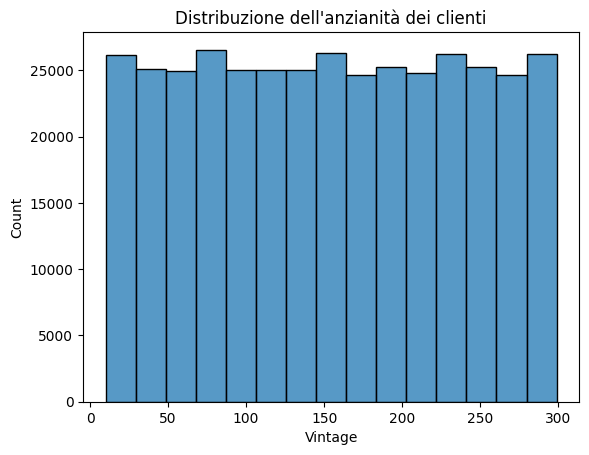

In [ ]:
sns.histplot(data=df, x="Vintage", bins=15)
plt.title("Distribuzione dell'anzianità dei clienti")

Risulta evidente dal grafico come ci sia una sostanziale equidistribuzione dell'anzianità dei clienti in tutto il dataset.

### Response

Indaghiamo qualche relazione agganciata alla variabile Response.

Come si può vedere dal grafico sottostante, la stessa equidistribuzione riscontrata sulla variabile Vintage, si riverbera sulla variabile Response, per cui non sembra esserci nessun legame o schema tra la conversione e l'anzianità del cliente.

Text(0.5, 1.0, "Distribuzione della variabile Response rispetto all'anzianità del cliente")

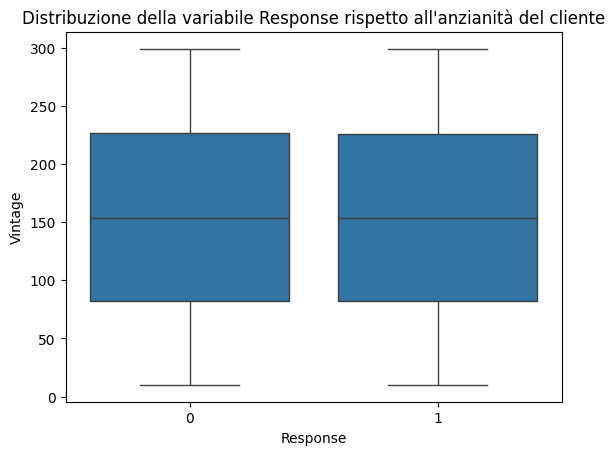

In [ ]:
sns.boxplot(data=df, x="Response", y="Vintage")
plt.title("Distribuzione della variabile Response rispetto all'anzianità del cliente")

Ben altro comportamento ha invece la variabile Response se paragonata all'età del cliente. Sembra infatti che le conversioni siano centrato su range di età molto più stretti e più alti.

Text(0.5, 1.0, "Distribuzione della variabile Response rispetto all'età del cliente")

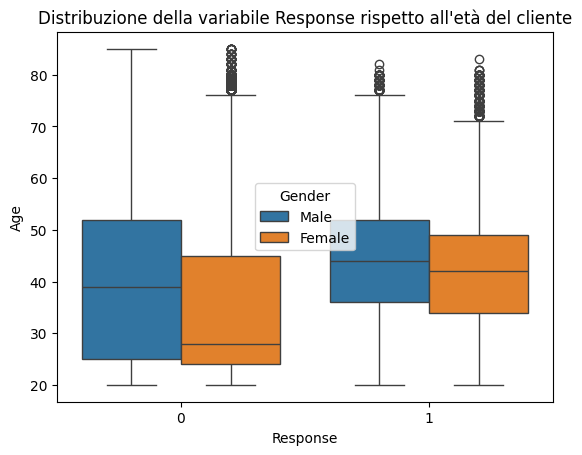

In [ ]:
sns.boxplot(data=df, x="Response", y="Age", hue="Gender")
plt.title("Distribuzione della variabile Response rispetto all'età del cliente")

Vediamo ora se sussista una relazione tra la conversione e il premio già pagato dal cliente

<Axes: xlabel='Response', ylabel='Annual_Premium'>

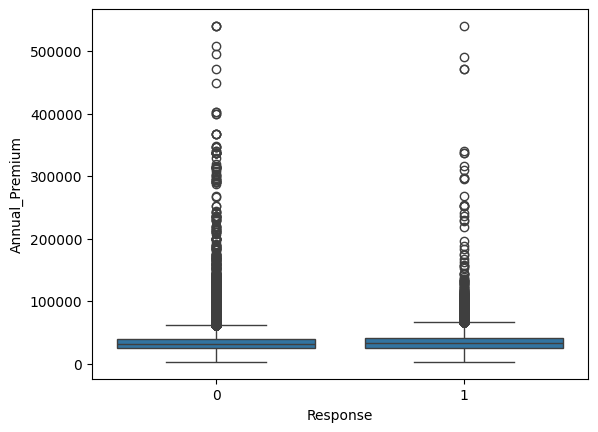

In [ ]:
sns.boxplot(data=df, x="Response", y="Annual_Premium")

Il grafico non restituisce, così come è, un'informazione esaustiva, schiacciato dagli outliars con valori di premio molto alti. La cosa non stupisce, vista l'analisi condotta nei capitoli percedenti per cui risultava proprio una fetta minoritaria di clientela con premi molto più alti del resto.

Per ottenere un grafico più parlante, isoliamo i valori di premio annuale a quelli inferiori di 80.000$.

Così facendo stiamo levando dal grafico solo 2365 osservazioni, poco rilevanti sia come significato che come numerica nel complesso, per la finalità di vedere graficamente la relazione tra la conversione e il premio.


In [ ]:
df[(df["Annual_Premium"]>=80000)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
168,Female,26,1,8.0,0,< 1 Year,Yes,89282.0,152.0,101,0
177,Male,25,1,28.0,1,< 1 Year,No,101021.0,152.0,49,0
316,Male,20,1,12.0,0,< 1 Year,Yes,82705.0,160.0,49,0
402,Male,65,1,28.0,0,1-2 Year,Yes,90789.0,26.0,186,1
430,Female,44,1,28.0,0,1-2 Year,Yes,119735.0,152.0,295,0
...,...,...,...,...,...,...,...,...,...,...,...
380120,Female,21,1,28.0,1,< 1 Year,No,92283.0,152.0,15,0
380314,Female,46,1,28.0,0,1-2 Year,Yes,95453.0,124.0,62,0
380335,Male,56,1,28.0,0,1-2 Year,Yes,80307.0,124.0,226,0


Text(0.5, 1.0, 'Distribuzione della variabile Response rispetto al premio annuale pagato')

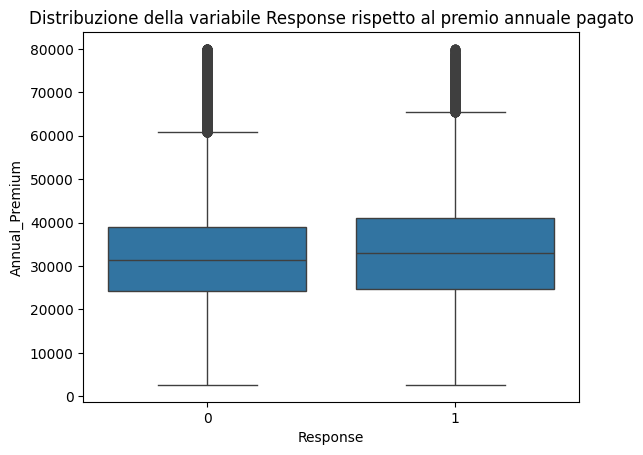

In [ ]:
sns.boxplot(data=df[(df["Annual_Premium"]<80000)], x="Response", y="Annual_Premium")
plt.title("Distribuzione della variabile Response rispetto al premio annuale pagato")

Da questa nuova visualizzazione possiamo dedurre che non sussistano, nel nostro dataset, delle differenze sostanziali nella conversione basate sul premio annuale.

Nel grafico sottostante invece indaghiamo la relazione tra la conversione e l'età del veicolo.

Si nota immediatamente come i contatti si siano concentrati su chi avesse veicoli da meno di 2 anni e che la maggiore percentuale di conversioni, in valore assoluto, si è avuta sul periodo di mezzo, tra 1 e 2 anni.

Text(0.5, 1.0, "Distribuzione delle frequenze della variabile Response rispetto all'età del veicolo")

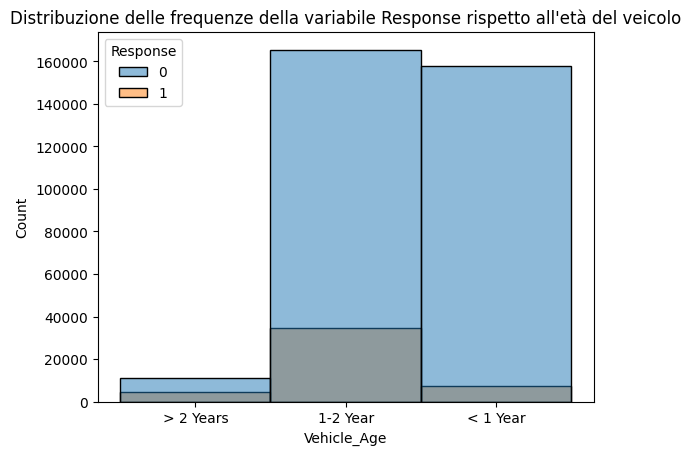

In [ ]:
sns.histplot(data=df, x="Vehicle_Age", hue="Response")
plt.title("Distribuzione delle frequenze della variabile Response rispetto all'età del veicolo")

Calcoliamo una matrice di contingenza per avere una conferma numerica della suddivisione percentuale delle conversioni per età del veicolo.

In [ ]:
pd.crosstab(df["Response"], df["Vehicle_Age"])

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,165510,157584,11305
1,34806,7202,4702


Calcoliamo ora la stessa tabella ma con le percentuali per colonna

In [ ]:
round(pd.crosstab(df["Response"], df["Vehicle_Age"])/pd.crosstab(df["Response"], df["Vehicle_Age"]).sum(),2)

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,0.83,0.96,0.71
1,0.17,0.04,0.29


Effettivamente, quanto riscontrato visivamente, trova conferma numericamente: nonostante in generale ci siano state più conversioni nel settore tra 1 e 2 anni di anizianità del veicolo, in rapporto ai contatti, la maggiore percentuale di successo si è avuta sul settore meno contattato, vale a dire con anzianità del veicolo maggiore di 2 anni.

Va anche detto però che, un tasso di conversione del 17% nel comparto tra 1 e 2 anni che ha circa 200.000 contatti, pesa ben più di un 29% sul comparto maggiore di 2 anni che ha però solo 15.000 contatti.

Come ultima analisi, vediamo se esista una relazione, nel nostro dataset, tra la conversione e la presenza o meno di un veicolo già assicurato

Text(0.5, 1.0, 'Distribuzione delle frequenze di Response rispetto a Previously Insured')

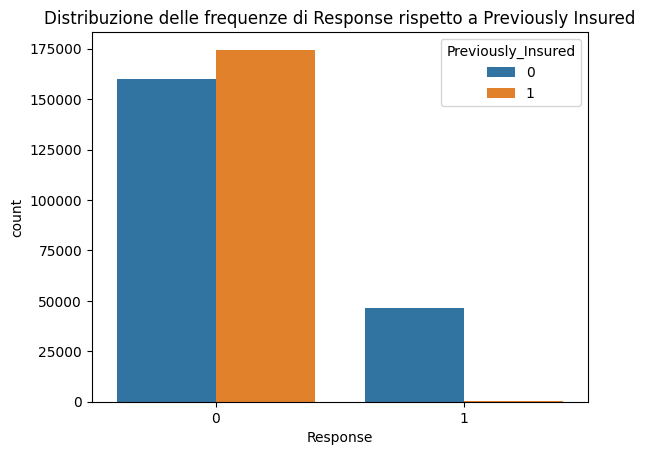

In [ ]:
sns.countplot(data=df, x="Response", hue="Previously_Insured")
plt.title("Distribuzione delle frequenze di Response rispetto a Previously Insured")

Come intuibile, le conversioni sono state quasi esclusivamente su persone che non avevano ancora un veicolo assicurato.

Degno di nota comunque il fatto che non si sia riusciti a convertire, in egual misura, sia chi aveva un veicolo assicurato che non.

## Pre-processing

In questa sezione si effettueranno tutte le manipolazioni necessarie al dataset per prepararlo alla fase di addestramento del modello di machine learning:
- eliminazione di enventuali anomalie
- conversione delle variabili qualitative in quantitative
- Standardizzazione

### Anomalia assicurazione senza patente

Come visto nella sezione precedente, esistono dei casi nel dataset, di persone cui è stata venduta una polizza auto pur non essendo dotati di patente.

Di seguito i casi presenti nel dataset:

In [ ]:
df[(df["Driving_License"]==0) & (df["Response"]==1)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
9258,Female,53,0,8.0,0,1-2 Year,Yes,39478.0,25.0,234,1
20931,Female,44,0,3.0,0,1-2 Year,Yes,35644.0,26.0,272,1
26168,Male,63,0,28.0,0,1-2 Year,Yes,2630.0,122.0,44,1
30955,Male,45,0,28.0,0,1-2 Year,Yes,51397.0,124.0,43,1
35297,Female,67,0,28.0,0,1-2 Year,Yes,56891.0,26.0,42,1
45455,Male,61,0,8.0,0,1-2 Year,Yes,2630.0,26.0,76,1
46301,Female,69,0,28.0,0,1-2 Year,Yes,31145.0,122.0,82,1
48343,Male,55,0,29.0,0,1-2 Year,Yes,2630.0,26.0,232,1
53513,Male,59,0,8.0,0,1-2 Year,Yes,47979.0,26.0,212,1


Ritenendo la cosa anomala, e trattandosi di un numero di casi irrisorio, per fare in modo che non influenzi negativamente il modello, si procede con l'eliminazione dal dataset di queste osservazioni.

In [ ]:
index_drlic_resp = df[(df["Driving_License"]==0) & (df["Response"]==1)].index

In [ ]:
df = df.drop(index=index_drlic_resp)

In [ ]:
df[(df["Driving_License"]==0) & (df["Response"]==1)]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,


Non esistono più, nel dataset, casi in cui Response == 1 e Driving_License == 0

### Conversione delle variabili qualitative

In questa sezione convertiremo in quantitative, le 3 variabili qualitative presenti nel dataset:
- Vehicle_Age
- Vehicle_Damage
- Gender

Dal momento che si può in effetti individuare un ordinamento, crescente o decrsescente che sia, per la variabile Vehicle Age, si opta per una scala 1,2,3 che si applicherà all'intero dataset.

In [ ]:
vehicle_age_map = {"> 2 Years":3, '1-2 Year':2, "< 1 Year":1}

In [ ]:
df["Vehicle_Age"] = df["Vehicle_Age"].map(vehicle_age_map)

df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,2,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,2,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,1,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,1,No,35118.0,160.0,161,0


In [ ]:
vehicle_damage_map = {"Yes":1, "No":0}

df["Vehicle_Damage"] = df["Vehicle_Damage"].map(vehicle_damage_map)

df



,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,Male,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,Male,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,Male,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,Female,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,2,0,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,1,0,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,1,0,35118.0,160.0,161,0


In [ ]:
gender_map = {"Male":1, "Female":0}

df["Gender"] = df["Gender"].map(gender_map)

df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,1,74,1,26.0,1,2,0,30170.0,26.0,88,0
381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381068 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381068 non-null  int64  
 1   Age                   381068 non-null  int64  
 2   Driving_License       381068 non-null  int64  
 3   Region_Code           381068 non-null  float64
 4   Previously_Insured    381068 non-null  int64  
 5   Vehicle_Age           381068 non-null  int64  
 6   Vehicle_Damage        381068 non-null  int64  
 7   Annual_Premium        381068 non-null  float64
 8   Policy_Sales_Channel  381068 non-null  float64
 9   Vintage               381068 non-null  int64  
 10  Response              381068 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 34.9 MB


Ora non esistono più dati testuali all'interno del nostro dataset.

### Standardizzazione

Su dataset molto grandi, la standardizzazione delle variabili, che non incide sul risultato finale in termini di modellazione, aiuta però l'algoritmo a convergere in maniera più efficiente.

Si procede pertanto con la standardizzazione delle variabili non binarie, laddove per standardizzazione si intende:

$$
Z = \frac{X - \mu}{\sigma}
$$

Dove $\mu$ coincide con la media e $\sigma$ coincide con la deviazione standard

In [ ]:
df_std = df.copy()

col_std = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel', 'Vintage']
to_std = df_std[col_std]

df_std[col_std] = (to_std - to_std.mean())/to_std.std()

df_std

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,0.333935,1,0.121771,0,3,1,0.574549,-1.587348,0.748783,1
2,1,2.397016,1,-1.767877,0,2,0,0.172649,-1.587348,0.342430,0
3,1,0.527349,1,0.121771,0,3,1,0.449064,-1.587348,-1.522015,1
4,1,-1.148904,1,-1.163190,1,1,0,-0.113003,0.737258,0.581461,0
5,0,-0.633134,1,1.104388,1,1,0,-0.178243,0.737258,-1.378596,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,1,2.268073,1,-0.029401,1,2,0,-0.022898,-1.587348,-0.792969,0
381106,1,-0.568663,1,0.802044,1,1,0,0.549103,0.737258,-0.279052,0
381107,1,-1.148904,1,0.272943,1,1,0,0.264555,0.884852,0.079496,0


## Creazione del modello

Ora abbiamo il dataset pronto per poter avviare l'addestramento che riesca a prevedere la variabile Response.

Trattandosi di un problema di classificazione, verrà utilizzato un algoritmo di regressione logistica. In sintesi, l'algoritmo mira a definire una separazione tra le due diverse classi, 1 o 0, classificando come 1 i punti soprastanti e come 0 quelli sottostanti.

La separazione tra le 2 classi sarà quella che minimizza una metrica ad hoc per questo algoritmo, chiamata log loss.

Ecco i passi e le formule:
- Definizione della separazione lineare tra le classi, vale a dire che l'algoritmo determinerà i pesi $w$ da associare alle variabili $x$ e l'intercetta o bias $b$
$$
z = b + w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}
$$

- Calcolo di z per ogni osservazione del dataset

- Trasposizione di z, appena calcolato, in una probabilità utilizzando la funzione sigmoide. Per valori superiori a 0,5 verrà associata la classe 1, diversamente la classe 0.

$$
\frac{1}{1+e^{-z}}
$$

- Calcolo della log loss per l'osservazione dove $y_{i}$ coincide con la classe vera nel dataset per l'iesima osservazione e $p_{i}$ alla probabilità restituita dalla sigmoide per quella medesima osservazione.

$$
-(y_{i}log(p_{i}) + (1-y_{i})log(1-p_{i}))
$$

### Punti di attenzione

Le classi all'interno del dataset, come visto nella fase di esplorazione, sono assolutamente sbilanciate. Pertanto si procederà con la definizione del modello bilanciandolo tramite l'apposita funzionalità "Class Weight".

Diversamente il modello potrebbe tendere a scegliere a prescindere la classe più frequente perchè ciò gli garantirebbe comunque buone prestazioni.

### Generazione dei set

Innanzitutto generiamo i dataset che utilizzeremo per addestrare prima e testare poi il nostro modello.

Puntiamo quindi a spezzare il dataset originario per averne il 70% da utilizzare come addestramento e il rimanente 30% come test. Innanzitutto convertiamo in array numpy, separandole dal dataset, le feature e il target

In [ ]:
X = df_std.drop("Response", axis=1).values
y = df_std["Response"].values

X.shape, y.shape, y.sum()

((381068, 10), (381068,), np.int64(46669))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

X_test.shape, y_test.shape

((114321, 10), (114321,))

Sia il campione di addestramento che di test hanno inoltre mantenuto la stessa percentuale di classi positive del dataset intero. Questo si rivelerà particolarmente utile più avanti quando si calcolerà il tasso di conversione effettivo del modello, al fine di confrontarlo con il 12% del dataset intero (ottenuto senza modello ovviamente)

In [ ]:
y_train.sum()/y_train.shape[0]

np.float64(0.12261431243837793)

In [ ]:
y_test.sum()/y_test.shape[0]

np.float64(0.1221297924265883)

### Addestramento del modello

In [ ]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

L'addestramento del modello ha calcolato, in base ai dati di addestramento, i coefficienti e l'intercetta della curva z che separa le 2 classi minimizzando la log loss.

In [ ]:
lr.coef_, lr.intercept_

(array([[ 1.13239687e-01, -3.15771883e-01,  4.34148436e+00,
         -3.22776528e-05, -3.94072060e+00,  7.58698259e-01,
          1.99489436e+00,  1.59455262e-02, -1.43275040e-01,
         -4.26374418e-03]]),
 array([-6.90509988]))

### Valutazione del modello

Per valutare il modello utilizzeremo ovviamente la log loss di cui abbiamo già parlato in precedenza, confrontandola tra il set di test e quello di addestramento. Questo ci consentirà di capire se il modello sia affetto da overfitting o underfitting.

Utilizzeremo poi la confusion matrix: una matrice 2x2 che ha sulle righe le classi vere e sulle colonne le classi predette e nelle singole celle le frequenze incrociate. Grazie ad essa potremo distillare ulteriori metriche come:
- Accuracy: percentuale delle previsione centrate su tutte le osservazioni del dataset
- Precision: percentuale che risponde alla domanda: "Di tutti i valori positivi predetti dal modello, quanti erano veri positivi?"
- Recall: percentuale che risponde alla domanda: "Di tutti i valori positivi presenti nel dataset, quanti sono stati correttamente predetti dal modello?"
- F1: media armonica tra Precision e Recall. È un indicatore compreso tra 0 e 1 laddove è 1 quando il modello rispecchia perfettamente  i dati, 0 altrimenti.

Chiaramente la valutazione verrà effettuata sia sul set di test che su quello di addestramento e verrà predisposta una funzione ad hoc.

In [ ]:
def eval_mod(model, X_model, y_model):

    y_proba = model.predict_proba(X_model)
    y_pred = model.predict(X_model)
    confusion = pd.DataFrame(confusion_matrix(y_model, y_pred), columns=["Predetti Negativi", "Predetti Positivi"],
                            index=["Negativi", "Positivi"])

    print(f"LOG LOSS: {round(log_loss(y_model, y_proba),3)}")
    print(f"ACCURACY: {round(accuracy_score(y_model, y_pred),3)}")
    print(f"PRECISION: {round(precision_score(y_model, y_pred),3)}")
    print(f"RECALL: {round(recall_score(y_model, y_pred),3)}")
    print(f"F1: {round(f1_score(y_model, y_pred),3)}")
    sns.heatmap(confusion, annot=True, fmt="g")



LOG LOSS: 0.491
ACCURACY: 0.639
PRECISION: 0.251
RECALL: 0.976
F1: 0.399


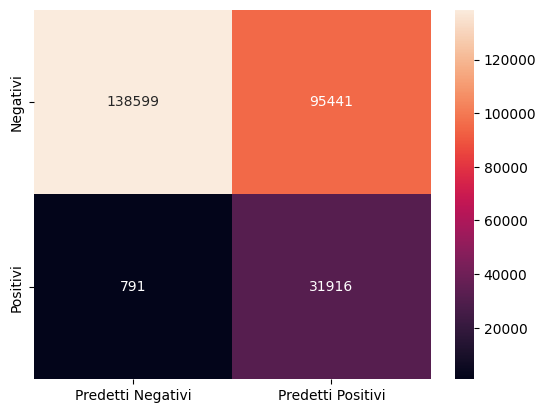

In [ ]:
eval_mod(lr, X_train, y_train)

LOG LOSS: 0.49
ACCURACY: 0.64
PRECISION: 0.25
RECALL: 0.978
F1: 0.399


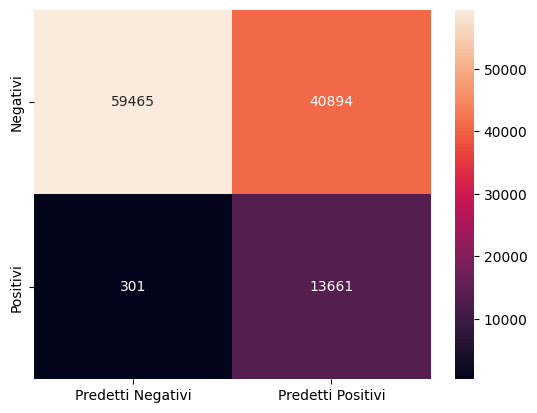

In [ ]:
eval_mod(lr, X_test, y_test)

La log loss tra i 2 set di dati è allineata, cosa che eclude la presenza di overfitting.

La recall, la percentuale di predizioni positive, dati tutti i positivi reali, è molto buona. La precision, la percentuale di previsioni positive corrette, è invece molto bassa e lo si vede anche dalla matrice di confusione. Il modello tende a fare troppe predizioni positive, laddove i falsi positivi sono sempre 3 volte rispetto ai veri positivi.

Una possibile ipotesi è che il parametro class_weight del modello impostato a "balanced" abbia penalizzato talmente la classe negativa da aver portato a uno sbilanciamento nel senso opposto.

Si aprono dunque due strade:
- affinare la predizione delle classi andando a ritoccare il valore soglia aumentandolo. Auspicabilmente questo farà calare le predizioni positive
- effettuare un random undersampling del set di addestramento. Si è deciso di adottare questa tecnica, piuttosto che l'oversampling, poichè si dispone comunque di un dataset da quasi 400.000 osservazioni totali di cui circa 47.000 positive. Anche con undersampling dunque si disporrebbe di un quantitativo di osservazioni totali nell'ordine delle decine di migliaia. Teoricamente l'argomento class_weight dovrebbe sortire lo stesso effetto del campionamento casuale, si tenta comunque per verificare.

Le strade verranno percorse entrambe e verranno valutati a valle i risultati

### Ritoccare la soglia

Introduciamo un indicatore ulteriore che chiameremo: tasso effettivo di conversione.

È un tasso che serve a confrontare quante conversioni vengono effettuate se la compagnia dovesse contattare solo i clienti indicati dal modello come classe positiva, rispetto a quello che la compagnia ha convertito chiamando tutti i clienti del dataset.

Se infatti fosse riscontrato che, contattando solo i clienti indicati dal modello, si otterrebbe una conversione uguale a quella ottenuta chiamando tutti, sarebbe un netto miglioramento per via del risparmio di tempo.

Di seguito una breve spiegazione matematica del confronto e del calcolo del tasso.

#### Conversione contattando tutti

Assumiamo un dataset (addestramento o test non importa) composto da n osservazioni. Abbiamo visto che il tasso di conversione si attesta sempre sul 12%

$$
\frac{\sum_{i=1}^{n}Response_{i}}{n}=0,12
$$

Questo traguardo lo si ottiene contattando ovviamente tutti gli n clienti

#### Conversione utilizzando il modello

Con il modello però possiamo restringere il campo di contatti ai soli clienti la cui classe predetta sia quella positiva. Supponendo di fornire in input al modello lo stesso dataset usato per contattare tutti, il modello classificherebbe una certa percentuale di questi come 1. Chiamiamo questa quantità $P^{LogReg}(Response=1)$

$$
P^{LogReg}(Response=1)=\frac{\sum_{i=1}^{n}Response_{i}}{n}
$$

Questa però non è la percentuale di conversioni, ma solo la percentuale di Response = 1 predetta dal modello, quindi la lista dei clienti da contattare. Di questi, convertiremo solo i veri positivi. Otteniamo quindi il Tasso Effettivo di Conversione (TEC) moltiplicando per la Precision

$$
TEC=P^{LogReg}(Response=1)*Precision
$$

Se $TEC\sim 0.12$ allora il modello ha portato un risparmio di tempo a parità di conversione. Se invece $TEC> 0.12$ oltre al risparmio di tempo abbiamo anche ottunuto un maggiore tasso di conversione.


In [ ]:
"""
New formula for evaluating the model by setting a different treshold than 0.5
It is also added the calculation for the true conversion rate by contacting only the clients in the class 1 predicted by the model.
This figure must be compared to 12% which is the conversion rate without the model.
"""

def eval_mod_thresh(model, X_model, y_model,thresh):

    y_proba = model.predict_proba(X_model)
    y_pred = np.where(y_proba[:,1]>thresh,1,0)
    confusion = pd.DataFrame(confusion_matrix(y_model, y_pred), columns=["Predetti Negativi", "Predetti Positivi"],
                            index=["Negativi", "Positivi"])
    split_01 = confusion.sum()/y_model.shape[0]
    pos_pred_ratio = split_01["Predetti Positivi"]

    print(f"LOG LOSS: {round(log_loss(y_model, y_proba),3)}")
    print(f"ACCURACY: {round(accuracy_score(y_model, y_pred),3)}")
    print(f"PRECISION: {round(precision_score(y_model, y_pred),3)}")
    print(f"RECALL: {round(recall_score(y_model, y_pred),3)}")
    print(f"F1: {round(f1_score(y_model, y_pred),3)}")
    print(f"TEC: {round(precision_score(y_model, y_pred)*pos_pred_ratio,2)}")
    sns.heatmap(confusion, annot=True, fmt="g")



LOG LOSS: 0.491
ACCURACY: 0.84
PRECISION: 0.324
RECALL: 0.282
F1: 0.302
TEC: 0.03


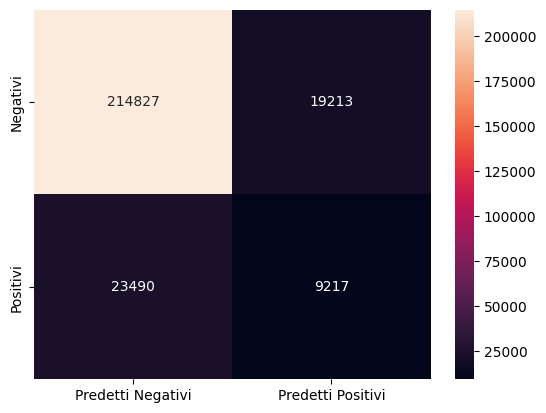

In [ ]:
eval_mod_thresh(lr, X_train, y_train, 0.75)

Ritoccare la soglia non ha sortito gli effetti sperati. La recall è drasticamente calata poichè, con l'aumento della soglia, sono aumentati molto di più i falsi negativi.

La precision è aumentata, ma non in maniera significativa, ma soprattutto, il tasso effettivo di conversione è calato al 3%, poichè l'aumento nella precision non bilancia la riduzione, più forte, delle classi positive predette per via dell'aumento della soglia.

### Undersampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy="majority")

X_train_usample, y_train_usample = undersampler.fit_resample(X_train, y_train)

X_train_usample.shape, y_train_usample.shape, y_train_usample.sum()

((65414, 10), (65414,), np.int64(32707))

In [ ]:
lr_usample = LogisticRegression()

lr_usample.fit(X_train_usample, y_train_usample)

LogisticRegression()

LOG LOSS: 0.442
ACCURACY: 0.785
PRECISION: 0.706
RECALL: 0.976
F1: 0.819


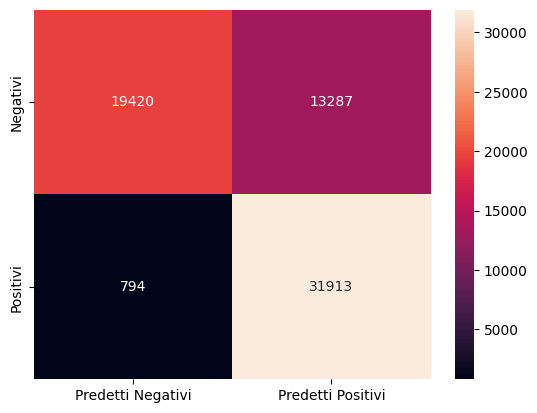

In [ ]:
eval_mod(lr_usample, X_train_usample, y_train_usample)

In [ ]:
X_test_usample, y_test_usample = undersampler.fit_resample(X_test, y_test)

X_test_usample.shape, y_test_usample.shape, y_test_usample.sum()


((27924, 10), (27924,), np.int64(13962))

LOG LOSS: 0.442
ACCURACY: 0.783
PRECISION: 0.704
RECALL: 0.978
F1: 0.819


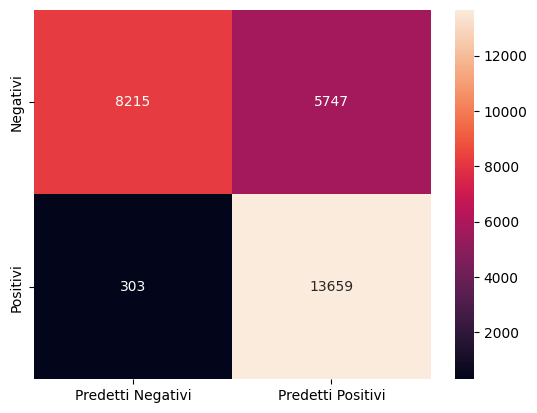

In [ ]:
eval_mod(lr_usample, X_test_usample, y_test_usample)

LOG LOSS: 0.442
ACCURACY: 0.77
PRECISION: 0.714
RECALL: 0.899
F1: 0.796
TEC: 0.45


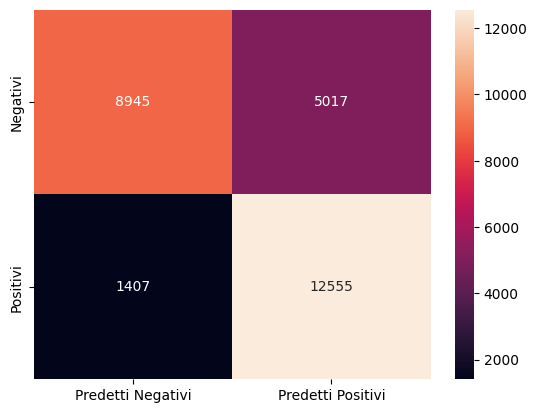

In [ ]:
eval_mod_thresh(lr_usample, X_test_usample, y_test_usample, 0.60)

Le metriche sono decisamente migliorate su tutti i fronti. Considerando il test set abbiamo infatti che:
- la log loss continua ad essere allineata tra addestramento e test e questo ci conferma nuovamente che il nostro modello non sia affetto da overfitting
- la accuracy è aumentata di circa 15 punti percentuali, attestandosi ora a circa il 79%
- la precision, vero tasto dolente del modello lr per cui si attestava appena al 25%, ora arriva al 71% circa
- la recall è rimasta inalterata rispetto al modello lr e quasi al 98%. Il modello genera quindi pochi falsi negativi
- F1, la media armonica tra precision e recall è raddoppiato, attestandosi ora a 82%

Se però al modello forniamo il set di test originario, con la distribuzione delle classi reale quindi e non bilanciata, che è quello che accadrebbe nella realtà, ecco che le performance si riallineano a quelle restituite dal modello con il parametro class_weight = "balanced".

Il tentativo con il cambio di approccio non ha dato nessun miglioramento e possiamo quindi concludere che i 2 modelli, class_weight e under sampling, si equivalgano.

LOG LOSS: 0.491
ACCURACY: 0.64
PRECISION: 0.25
RECALL: 0.978
F1: 0.399
TEC: 0.12


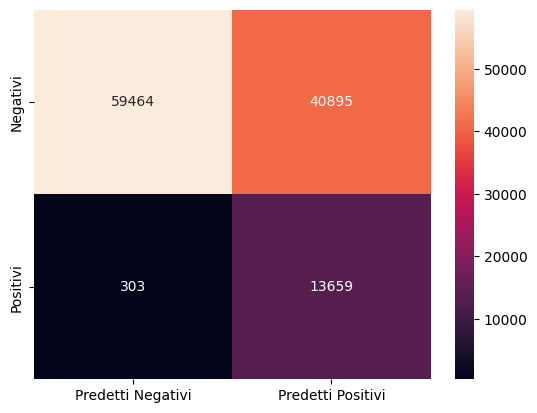

In [ ]:
eval_mod_thresh(lr_usample, X_test, y_test, 0.5)

### ROC e AUC

Concludiamo con la curva ROC e il calcolo di AUC, così da avere un quadro completo del modello

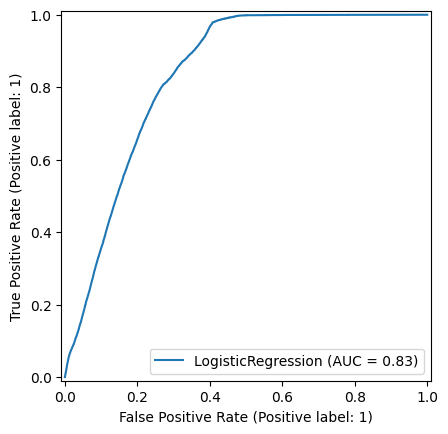

In [ ]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)

La ROC curve e l'indicatore AUC, indicano che il modello sia comunque in grado di differenziare, per diversi livelli di soglia, tra le due classi, avendo un tasso di veri positivi sempre maggiore di quello dei falsi positivi.

## Conclusioni

Le metriche non sono pessime, ma va detto che non siano nemmeno ottime. In particolare si guarda alla Precision, dal momento che l'applicazione primaria del modello sarà quella di prevedere quali siano le classi positive al fine di contattare solo quei clienti e non l'intero dataset.

Al momento infatti il modello ottiene una precision del 25%

In [ ]:
y_pred = lr.predict(X_test)

print(f"PRECISION SCORE del modello lr: {precision_score(y_test,y_pred): .2f}")

PRECISION SCORE del modello lr:  0.25


È davvero un risultato così negativo?

Per rispondere a questa domanda analizziamo i due diversi scenari, con e senza il supporto del modello.

Supponiamo dunque che gli agenti assicurativi debbano contattare e provare a convertire con una polizza auto, i clienti indicati nel campione di test che contiene il seguente numero di contatti

In [ ]:
y_test.shape

(114321,)

In uno scenario senza l'ausilio del modello, la compagnia assicurativa avrebbe dovuto tenere degli agenti al telefono per contattare tutti i 114.321 clienti.

Sappiamo dall'analisi esplorativa condotta sull'intero dataset, che la percentuale di conversione media è del 12% e la stessa percentuale si riflette anche sul test set

In [ ]:
round( df["Response"].value_counts()/df["Response"].value_counts().sum(),2)

,count
Response,
0,0.88
1,0.12


In [ ]:
round(y_test.sum()/y_test.shape[0],2)

np.float64(0.12)

Nello scenario con il supporto del modello, invece, sappiamo che, dandogli in input il campione di test, restituirebbe il 48% di esso come potenziali conversioni.

In [ ]:
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Predetti Negativi", "Predetti Positivi"],
                            index=["Negativi", "Positivi"])

confusion

,Predetti Negativi,Predetti Positivi
Negativi,59465,40894
Positivi,301,13661


In [ ]:
round(confusion.sum()/y_test.shape[0],2)

,0
Predetti Negativi,0.52
Predetti Positivi,0.48


Sappiamo inoltre che, di tutti i positivi predetti dal modello, il 25% sono veri positivi e quindi conversioni effettive. Questo vuol dire che il tasso effettivo di conversione, applicando il modello, arriva a:

In [ ]:
round((confusion.sum()/y_test.shape[0])["Predetti Positivi"]*precision_score(y_test, lr.predict(X_test)),2)

np.float64(0.12)

In sostanza, stiamo ottenendo lo stesso tasso di conversione, ma contattando la metà dei clienti.

Questo è chiaramente un risparmio di tempo, dati i numeri di cui si parla, non trascurabile e che può essere facilmente convertito in risparmio economico una volta saputo quanto personale è stato addetto al contatto dei clienti per cross-selling.

Di conseguenza, seppure vero che le metriche legate alla precisione non sono buone, ciò non toglie utilità al modello che sarebbe comunque in grado di far risparmiare tempo e quindi denaro alla compagnia.

### Suggerimenti

Per rendere ancora più efficace la conversione, si potrebbe dare priorità, tra i contatti indicati dal modello, a quelli che:
- hanno età superiore ai 35 anni
- hanno un veicolo con età compresa tra 1 e 2 anni
- il veicolo non è assicurato

È emerso infatti dall'analisi descrittiva compiuta sul dataset, come questi parametri possano influenzare la variabile Response.